# Section 01

## Group assignment

In [2]:
# pandas is the standard python package for wrangling data
import pandas as pd

# matplotlib is the standard python package for producing plots
import random
import  matplotlib
from matplotlib import pylab, mlab, pyplot
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# seaborn is a popular python package for visualizing data. It is built on top of matplotlib
import seaborn as sns

In [3]:
# load student list CSV as dataframe
students = pd.read_csv('../../cogs9FA22.csv')

In [4]:
# remove your PIDs for privacy
students = students[[column_name for column_name in students.columns if column_name != 'PID']]

In [5]:
# observe dataframe
students

,Sec ID,Student,Pronoun,Credits,College,Major,Level,Email
0,106336,"A, Kunisha",NaN,4,SN,CG35,FR,ka@ucsd.edu
1,106334,"Abder Rahim Urbina, Rashid",NaN,4,WA,CS25,FR,rabderrahimurbina@ucsd.edu
2,106338,"Abille, Katelyn",NaN,4,SI,DS25,FR,kabille@ucsd.edu
3,106338,"Agarwal, Garvit",He/Him,4,SN,MA30,SO,gagarwal@ucsd.edu
4,106336,"Ageel, Ahmad",NaN,4,TH,DS25,FR,aageel@ucsd.edu
...,...,...,...,...,...,...,...,...
303,106334,"Zhang, Rukun",NaN,4,SN,EN30,JR,ruz044@ucsd.edu
304,106334,"Zhang, Tianqi",NaN,4,MU,DS25,SO,tiz019@ucsd.edu
305,106338,"Zhao, Yiran",She/Her,4,WA,DS25,SO,yiz219@ucsd.edu
306,106336,"Zheng, Qirui",NaN,4,SN,DS25,SO,q7zheng@ucsd.edu


In [6]:
# Filter by section id

# sectionID = 106336 #A03, Wed 4-5
sectionID = 106337 #A04, Wed 5-6

section = students[students['Sec ID'] == sectionID].reset_index(drop=True)

In [7]:
section

,Sec ID,Student,Pronoun,Credits,College,Major,Level,Email
0,106337,"Agrawal, Reva",NaN,4,FI,MC27,FR,ragrawal@ucsd.edu
1,106337,"Anaya, David",NaN,4,RE,MA27,JR,daanaya@ucsd.edu
2,106337,"Barrios, Luna",NaN,4,WA,PS30,FR,lubarrios@ucsd.edu
3,106337,"Batbayar, Jessica",She/Her,4,WA,DS25,FR,jbatbayar@ucsd.edu
4,106337,"Buljat, Preston",NaN,4,WA,IS34,SR,pbuljat@ucsd.edu
...,...,...,...,...,...,...,...,...
58,106337,"Wang, Ellie",She/Her,4,FI,DS25,SO,ekw002@ucsd.edu
59,106337,"Wong, Walter",NaN,4,SI,DS25,SR,wcw003@ucsd.edu
60,106337,"Xu, Yangang",NaN,4,WA,CS26,JR,yax016@ucsd.edu
61,106337,"Yang, Michael",NaN,4,SN,CG25,FR,miy012@ucsd.edu


<AxesSubplot:xlabel='Level', ylabel='Count'>

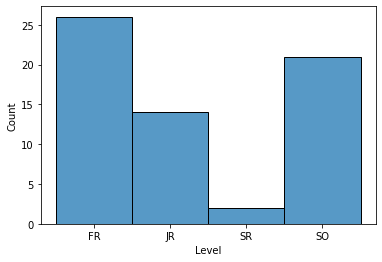

In [8]:
plt.figure()
sns.histplot(section['Level'])

<AxesSubplot:xlabel='Count', ylabel='Major'>

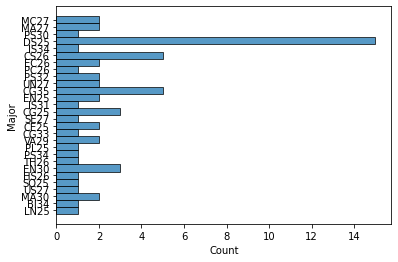

In [9]:
plt.figure()
sns.histplot(y = section['Major'])

### Assign groups

There are many ways to partition a set into groups of a fixed size.
Here is a simple way of doing it.

In [10]:
group_size = 5

# find number of students
n_students = len(section)

# find n groups
n_groups = int(n_students/5)

print(str(n_students) + ' students')
print(str(n_groups) + ' groups')

63 students
12 groups


In [11]:
# shuffle groups

# create an array of group indices 
group_assignments = pd.Series(list(range(0, n_students))).apply(lambda a: a % n_groups)
group_assignments

0      0
1      1
2      2
3      3
4      4
      ..
58    10
59    11
60     0
61     1
62     2
Length: 63, dtype: int64

In [12]:
# shuffle group indices 
random.shuffle(group_assignments)
group_assignments

0     0
1     0
2     4
3     9
4     8
     ..
58    7
59    3
60    6
61    1
62    4
Length: 63, dtype: int64

In [13]:
# animals = pd.Series(['aardvark','badger','caterpillar','dragonfly','elephant','frog','gorilla','hedgehog','iguana','jaguar','koala','lion','monkey'])
foods = pd.Series(['apple','banana','cherry','durian','eggplant','fig','grape','hazelnut','iceberg','jackfruit','kiwi','longan','mango'])


In [16]:
section['group_assignment'] = list(group_assignments.astype(str).apply(lambda n: n.zfill(2)))
section['group'] = list(foods[group_assignments])
section = section.sort_values('group_assignment').reset_index(drop=True)

In [17]:
section

,Sec ID,Student,Pronoun,Credits,College,Major,Level,Email,group_assignment,group
0,106337,"Agrawal, Reva",NaN,4,FI,MC27,FR,ragrawal@ucsd.edu,00,apple
1,106337,"Anaya, David",NaN,4,RE,MA27,JR,daanaya@ucsd.edu,00,apple
2,106337,"Uwaine, Dylan",NaN,4,WA,EN30,FR,duwaine@ucsd.edu,00,apple
3,106337,"Liu, Bingyan",NaN,4,SI,DS25,FR,bil010@ucsd.edu,00,apple
4,106337,"Chay De Leon, Dennys",NaN,4,WA,EC26,FR,dchaydeleon@ucsd.edu,00,apple
...,...,...,...,...,...,...,...,...,...,...
58,106337,"Plotkin, Madison",NaN,4,RE,VA29,SO,mjplotkin@ucsd.edu,11,longan
59,106337,"Kho, Reynard",NaN,4,RE,CE25,JR,rekho@ucsd.edu,11,longan
60,106337,"Chen, Hongyou",NaN,4,SN,PC26,SO,hoc019@ucsd.edu,11,longan
61,106337,"Truong, Theresa",NaN,4,WA,EN30,FR,tht014@ucsd.edu,11,longan


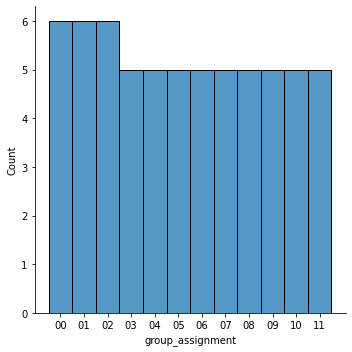

In [18]:
# lets visualize what's going on here. Wait what?
sns.displot(section['group_assignment'])

In [19]:
section.to_csv('cogs9_section_{}_group_assignments.csv'.format(sectionID))

In [22]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(section[['group','Student','Email']])

        group                   Student                      Email
0       apple             Agrawal, Reva          ragrawal@ucsd.edu
1       apple              Anaya, David           daanaya@ucsd.edu
2       apple             Uwaine, Dylan           duwaine@ucsd.edu
3       apple              Liu, Bingyan            bil010@ucsd.edu
4       apple      Chay De Leon, Dennys       dchaydeleon@ucsd.edu
5       apple               Kant, Romir             rkant@ucsd.edu
6      banana             Yang, Michael            miy012@ucsd.edu
7      banana            Musini, Shreya          shmusini@ucsd.edu
8      banana               Gully, Wren            wgully@ucsd.edu
9      banana            Njuguna, Grace          gnjuguna@ucsd.edu
10     banana           Pagaduan, Paige         ppagaduan@ucsd.edu
11     banana              Chun, Curtis            cuchun@ucsd.edu
12     cherry              Ramos, Jorge           jlramos@ucsd.edu
13     cherry  Santacruz Ibarra, Sadrac  ssantacruzibarra@ucsd

In [ ]:
Jaeyeon Lee ax008266@acsmail.ucsd.edu
Kate Zhou yuz235@ucsd.edu
fig Jack Kirwan jkirwan@ucsd.edu
fig Yijun Luo   yil176@ucsd.edu

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(section[['group','Student','Email']])

In [ ]:
saransh malik - s2malik@ucsd.edu
Jasmine Zhang - jiz186@ucsd.edu

In [ ]:
def make_email(df):
    print('')
    print(' '.join(list(df['Email'])))

In [ ]:
section[['group','Student','Email']].groupby('group').apply(make_email)